# Index <a name='ind'/>
<a href=#loadImp>Import and Load Dataset</a><br>
<a href=#colrow>Analyzing Rows and Columns</a><br>
<a href=#nanValAna>Analyzing NaN Values</a><br>
<a href=#filtnancol>Filtering out NaN Valued Columns</a><br>
<a href=#discnan>Discard NaN Valued Rows</a><br>
<a href=#cn2con>Coverting Countries to Continent</a><br>
<a href=#cnplot>Country-wise participants frequency</a><br>
<a href=#unvalatt>Unique values frequency in Attributes</a><br>
<a href=#saldist>Salary Distribution</a><br>
<a href=#salproc>Salary Processing (based on countrywise avg. salary)</a><br>

In [1]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import pycountry_convert as pc
from geopy.geocoders import Nominatim
import geopandas as gpd
from collections import Counter
import cmd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
sns.set_theme()
%matplotlib inline

In [2]:
#Loading SODS

df = pd.read_csv("survey_results_public.csv")
# df

# Analyzing Rows and Colums <a name='colrow' />
<a href=#ind> Go top</a>

In [3]:
cols = list(df.columns)
n_of_cols = len(cols)
n_of_rows = df.shape[0]
print('# cols in SODS:', n_of_cols)
print('# rows in SODS:', n_of_rows)

print('\nColumns:\n---------')
# for nCols in cols:
#       print(nCols)
cmd.Cmd().columnize(cols, displaywidth=120)

# cols in SODS: 79
# rows in SODS: 73268

Columns:
---------
ResponseId            Currency                      NEWCollabToolsWantToWorkWith    SOComm         Knowledge_6        
MainBranch            CompTotal                     OpSysProfessional use           Age            Knowledge_7        
Employment            CompFreq                      OpSysPersonal use               Gender         Frequency_1        
RemoteWork            LanguageHaveWorkedWith        VersionControlSystem            Trans          Frequency_2        
CodingActivities      LanguageWantToWorkWith        VCInteraction                   Sexuality      Frequency_3        
EdLevel               DatabaseHaveWorkedWith        VCHostingPersonal use           Ethnicity      TimeSearching      
LearnCode             DatabaseWantToWorkWith        VCHostingProfessional use       Accessibility  TimeAnswering      
LearnCodeOnline       PlatformHaveWorkedWith        OfficeStackAsyncHaveWorkedWith  MentalHealth   Onboard

# Analyzing NaN values <a name='nanValAna' />
<a href=#ind>Go top</a>

In [4]:
check_nan = df[cols].isnull().sum()
check_nan = check_nan/n_of_rows*100
dicts = dict(zip(cols, check_nan))
# for (key, value) in dicts.items():
#     print(key,': ' ,value)

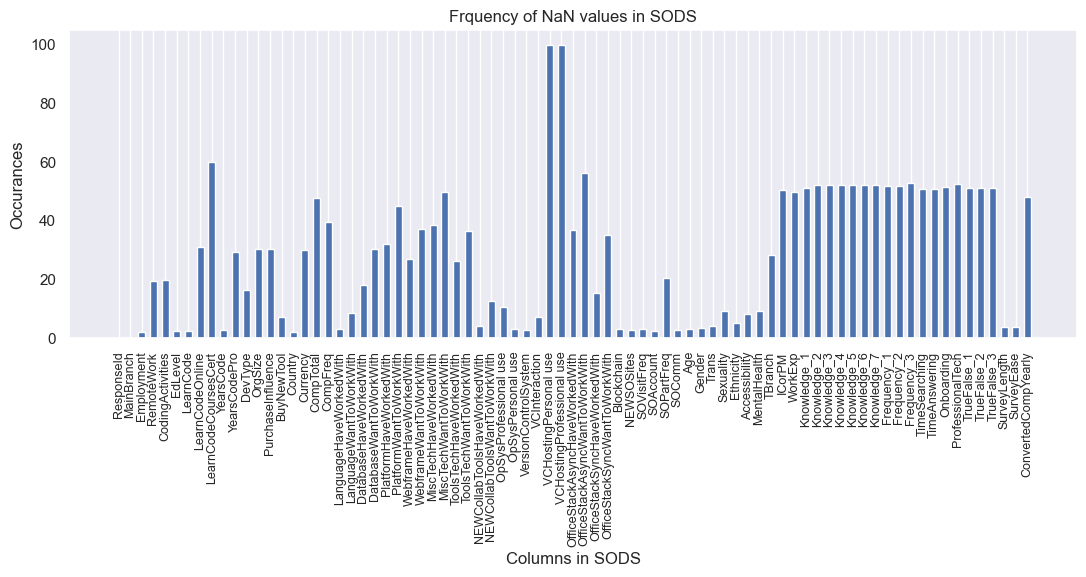

In [5]:
# Plotting column-wise null values
plt.rcParams['figure.figsize'] = [13, 4]
plt.rcParams['figure.dpi'] = 100
plt.bar(cols, check_nan, width = .6)
plt.xticks(rotation='vertical',fontsize = 9)
plt.title('Frquency of NaN values in SODS')
plt.xlabel('Columns in SODS')
plt.ylabel('Occurances')
plt.grid(axis='y')
plt.show()

# Filtering out NaN valued columns <a name='filtnancol' />
<a href=#ind>Go top</a>

In [6]:
Th = 50
newDict = dict()

for (key, value) in dicts.items():
    if value <= Th:
        newDict[key] = value
print('Filtered Dictionary : ')
for (key, value) in newDict.items():
#     print(key,': ' ,value)
    print(key, ': %.3f' % (value))

Filtered Dictionary : 
ResponseId : 0.000
MainBranch : 0.000
Employment : 2.128
RemoteWork : 19.531
CodingActivities : 19.612
EdLevel : 2.316
LearnCode : 2.304
LearnCodeOnline : 30.822
YearsCode : 2.644
YearsCodePro : 29.256
DevType : 16.332
OrgSize : 30.339
PurchaseInfluence : 30.435
BuyNewTool : 7.241
Country : 2.043
Currency : 30.032
CompTotal : 47.560
CompFreq : 39.366
LanguageHaveWorkedWith : 3.130
LanguageWantToWorkWith : 8.518
DatabaseHaveWorkedWith : 17.944
DatabaseWantToWorkWith : 30.373
PlatformHaveWorkedWith : 31.861
PlatformWantToWorkWith : 44.839
WebframeHaveWorkedWith : 26.920
WebframeWantToWorkWith : 37.050
MiscTechHaveWorkedWith : 38.593
MiscTechWantToWorkWith : 49.760
ToolsTechHaveWorkedWith : 26.065
ToolsTechWantToWorkWith : 36.444
NEWCollabToolsHaveWorkedWith : 3.987
NEWCollabToolsWantToWorkWith : 12.502
OpSysProfessional use : 10.598
OpSysPersonal use : 3.146
VersionControlSystem : 2.578
VCInteraction : 6.977
OfficeStackAsyncHaveWorkedWith : 36.912
OfficeStackSyncHa

# Discard NaN valued rows <a name='discnan' />
<a href=#ind>Go top</a>

In [7]:
# Removing entries with multiple NaN values

#att = ['Employment', 'EdLevel', 'Country', 'LearnCode']
att = newDict.keys()
df[att].dropna()

ResponseId                                         MainBranch  \
11             12  I am not primarily a developer, but I write co...   
14             15                     I am a developer by profession   
25             26                     I am a developer by profession   
51             52                     I am a developer by profession   
55             56                     I am a developer by profession   
...           ...                                                ...   
73072       73073                     I am a developer by profession   
73089       73090                     I am a developer by profession   
73093       73094                     I am a developer by profession   
73101       73102                     I am a developer by profession   
73116       73117                     I am a developer by profession   

                                              Employment  \
11     Employed, full-time;Independent contractor, fr...   
14     Employed, full-time;Independent contractor, fr...   
25                                   Employed, full-time   
51                                   Employed, full-time   
55                                   Employed, full-time   
...                                                  ...   
73072                                Employed, full-time   
73089  Employed, full-time;Independent contractor, fr...   
73093                                Employed, full-time   
73101                                Employed, full-time   
73116                                Employed, full-time   

                                 RemoteWork  \
11                             Fully remote   
14                             Fully remote   
25     Hybrid (some remote, some in-person)   
51     Hybrid (some remote, some in-person)   
55                             Fully remote   
...                                     ...   
73072  Hybrid (some remote, some in-person)   
73089                          Fully remote   
73093  Hybrid (some remote, some in-person)   
73101                          Fully remote   
73116  Hybrid (some remote, some in-person)   

                                        CodingActivities  \
11     Hobby;Contribute to open-source projects;Freel...   
14                         Hobby;Freelance/contract work   
25                                                 Hobby   
51                                                 Hobby   
55                                                 Hobby   
...                                                  ...   
73072           Hobby;Contribute to open-source projects   
73089                      Hobby;Freelance/contract work   
73093                     Hobby;Bootstrapping a business   
73101                       I don’t code outside of work   
73116  Hobby;Contribute to open-source projects;Freel...   

                                                 EdLevel  \
11          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
14       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
25       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
51          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
55       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
...                                                  ...   
73072       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73089  Some college/university study without earning ...   
73093  Some college/university study without earning ...   
73101       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73116       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                               LearnCode  \
11     Other online resources (e.g., videos, blogs, f...   
14     Other online resources (e.g., videos, blogs, f...   
25     Books / Physical media;Other online resources ...   
51     Books / Physical media;Other online resources ...   
55     Other online resources (e.g., videos, blogs, f...   
...                                                  .

# Converting countries to continents <a name='cn2con' />
<a href=#ind>Go top</a>

In [8]:
# https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    except:
        country_alpha2 = 'Unknown'
#     print(country_alpha2)
    try:
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    except:
        country_continent_code = 'Unknown'
    try:
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    except:
        country_continent_name = 'Unknown'
    return country_continent_name

def country_name_process(countryNoNan, old_name, new_name):
    for i in range(0, len(old_name)):
        countryNoNan = countryNoNan.replace(old_name[i], new_name[i])
    return countryNoNan

In [9]:
countryNoNan = df['Country'].dropna()
# cnSalNoNan = df[['Country', 'ConvertedCompYearly']].dropna()
# countryNoNan = countryNoNan.replace('Hong Kong (S.A.R.)', 'Hong Kong')
# countryNoNan = countryNoNan.replace('Iran, Islamic Republic of...', 'Iran')
# countryNoNan = countryNoNan.replace('The former Yugoslav Republic of Macedonia', 'North Macedonia')
# old_name = ['Hong Kong (S.A.R.)',
#             'Iran, Islamic Republic of...',
#             'The former Yugoslav Republic of Macedonia',
#             'Republic of Korea',
#             'Congo, Republic of the...',
#             'Timor-Leste',
#             'Swaziland']
# new_name = ['Hong Kong',
#             'Iran',
#             'North Macedonia',
#             'South Korea',
#             'Republic of the Congo',
#             'Democratic Republic of Timor-Leste',
#             'Eswatini']

old_name = ['Hong Kong (S.A.R.)',
            'Iran, Islamic Republic of...',
            'The former Yugoslav Republic of Macedonia',
            'Republic of Korea',
            'Congo, Republic of the...',
            'Timor-Leste',
            'United Kingdom of Great Britain and Northern Ireland',
            'United States of America',
            'Swaziland']
new_name = ['Hong Kong',
            'Iran',
            'North Macedonia',
            'South Korea',
            'Republic of the Congo',
            'Democratic Republic of Timor-Leste',
            'United Kingdom',
            'United States',
            'Eswatini']

countryNoNan = country_name_process(countryNoNan, old_name, new_name)
# print(countryNoNan.unique())

In [10]:
countriesV = countryNoNan.unique()
# countriesV = []
# for c in countries:
#     if c != 'Nomadic' and c != np.nan:
#         countriesV.append(c)
        # print(c,':',country_to_continent(c))
# countriesV
# country_to_continent('Iran')
# countries.tolist()
cmd.Cmd().columnize(sorted(countriesV.tolist()), displaywidth=160)

Afghanistan             Croatia                             Iraq                              Namibia                Singapore                           
Albania                 Cuba                                Ireland                           Nepal                  Slovakia                            
Algeria                 Cyprus                              Isle of Man                       Netherlands            Slovenia                            
Andorra                 Czech Republic                      Israel                            New Zealand            Solomon Islands                     
Angola                  Côte d'Ivoire                       Italy                             Nicaragua              Somalia                             
Antigua and Barbuda     Democratic Republic of Timor-Leste  Jamaica                           Niger                  South Africa                        
Argentina               Democratic Republic of the Congo    Japan           

In [11]:
print('Number of countries in SODS2022:', len(countriesV))
cmd.Cmd().columnize(sorted(countryNoNan.unique().tolist()), displaywidth=140)
# countriesV

Number of countries in SODS2022: 179
Afghanistan                         Djibouti                          Lesotho                 Republic of the Congo                 Yemen   
Albania                             Dominican Republic                Liberia                 Romania                               Zambia  
Algeria                             Ecuador                           Libyan Arab Jamahiriya  Russian Federation                    Zimbabwe
Andorra                             Egypt                             Lithuania               Rwanda                              
Angola                              El Salvador                       Luxembourg              Saint Kitts and Nevis               
Antigua and Barbuda                 Estonia                           Madagascar              Saint Lucia                         
Argentina                           Eswatini                          Malawi                  San Marino                          
Armenia         

# Country-wise participants frequency <a name='cnplot'/>
<a href=#ind>Go top</a>

In [12]:
# from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="DataMining")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

# countryNoNan = set_with_no_nan('Country')
countryFrq = countryNoNan.value_counts()
# countryFrq['Hong Kong']

In [13]:
# count = countryNoNan['country'].value_counts()
# countryNoNan.unique()
CountryDict = dict()
for i in countriesV:
    cord = geolocate(i)
    try:
        CountryDict[i] = [cord, countryFrq[i]]
    except:
        print(i, 'has problem')

In [14]:
print(geolocate('Eswatini'))
# print(geolocate('United States'))

(-26.5624806, 31.3991317)


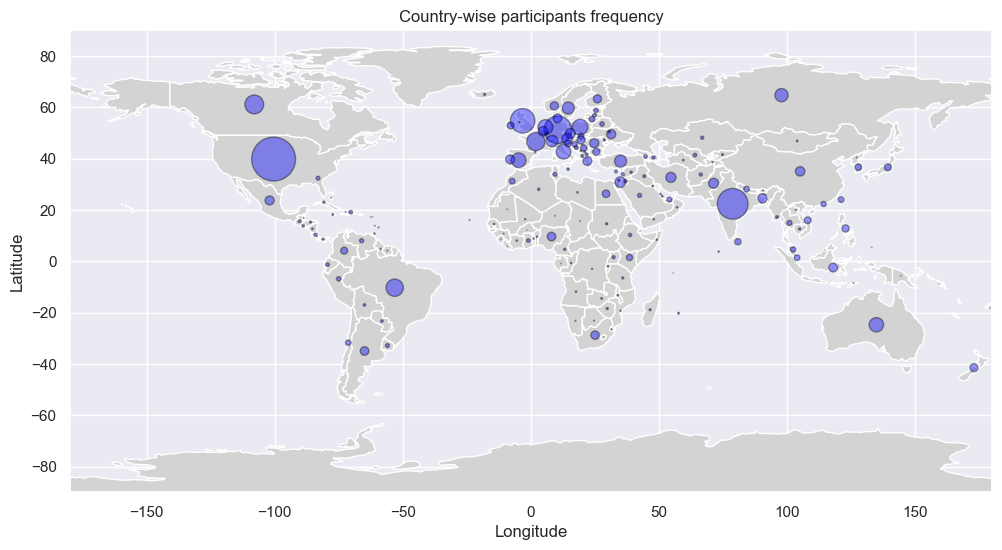

In [15]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# worldmap = worldmap[['continent', 'geometry', 'pop_est']]
# continents = worldmap.dissolve(by='continent', aggfunc='sum')

fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(ax=ax, color = 'lightgray')
# continents.plot(column = 'pop_est', cmap='YlOrRd', scheme='boxplot', ax=ax);
x = []
y = []
z = []
threshold = 10
for ck in CountryDict:
    x.append(CountryDict[ck][0][1])
    y.append(CountryDict[ck][0][0])
    z.append(CountryDict[ck][1])

z = (z/max(z))*1000
# cz= z/max(z)
# cz = ds['ConvertedCompYearly']
# cz= cz/max(cz)
# print(len(x))
# plt.scatter(x, y, s=z, c=cz, alpha=0.6, vmin=0, vmax=max(cz), cmap='coolwarm')
plt.scatter(x, y, s=z, c='blue', alpha=0.4, edgecolor='black', linewidth=1)

# plt.colorbar(label='Occurance')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Country-wise participants frequency")
plt.show()

# Unique values frequency in Attributes <a name ='unvalatt' />
<a href=#ind>Go top</a>

In [16]:
# print(newDict)
att = dicts.keys()
attDict = dict()
for (key, value) in dicts.items():
    attDict[key] = [value]
# attDict
for i in att:
    a = df[i].unique()
    attDict[i].append(len(a))
    attDict[i].append(a)

# attDict['MainBranch']

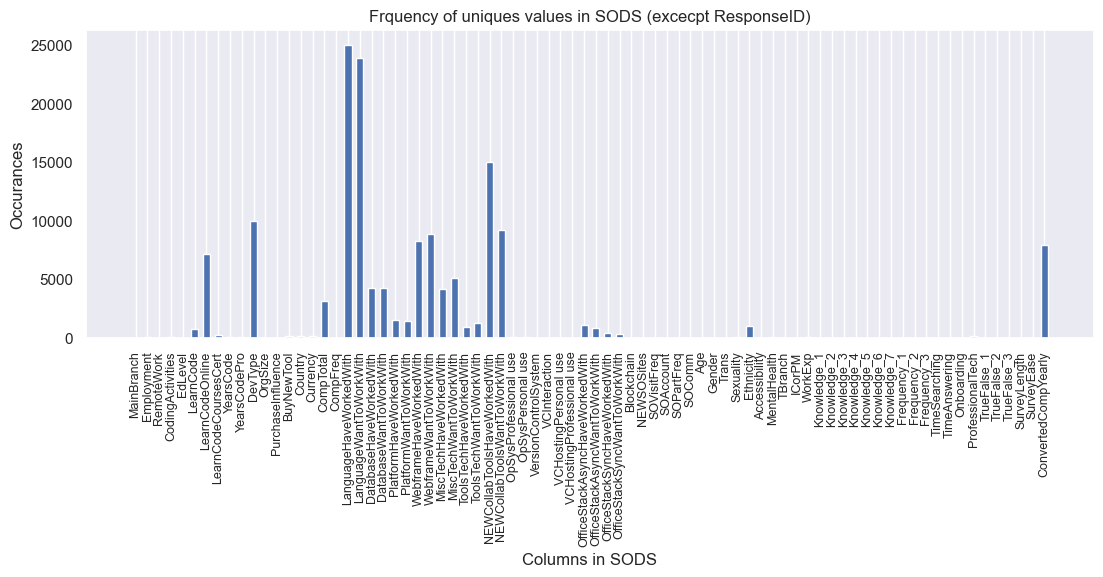

In [17]:
# Plotting column-wise null values
# att = newDict.keys()
# att
uAtt = []
for i in att:
    uAtt.append(attDict[i][1])
att
plt.rcParams['figure.figsize'] = [13, 4]
plt.rcParams['figure.dpi'] = 100
plt.bar(cols[1:len(cols)], uAtt[1:len(uAtt)], width = .6)
plt.xticks(rotation='vertical',fontsize = 9)
plt.title('Frquency of uniques values in SODS (excecpt ResponseID)')
plt.xlabel('Columns in SODS')
plt.ylabel('Occurances')
plt.grid(axis='y')
plt.show()

# Salary Distribution Analysis <a name='saldist' />
<a href=#ind>Go top</a>

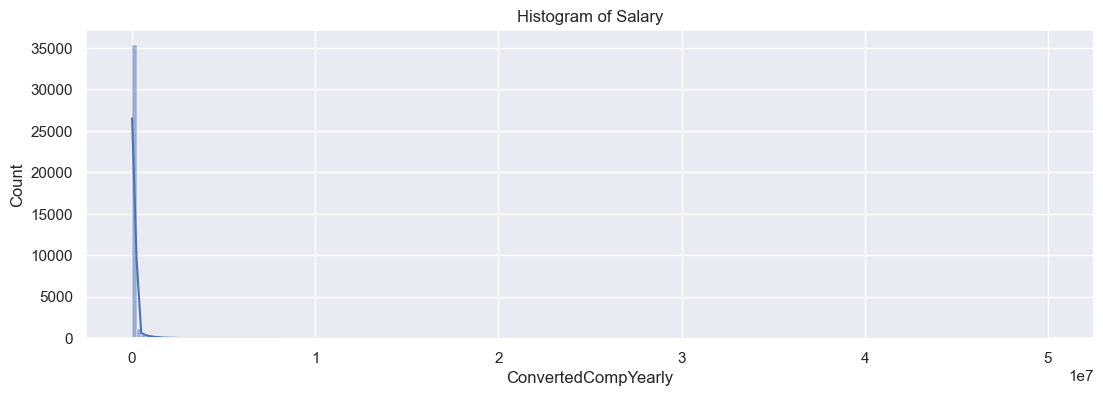

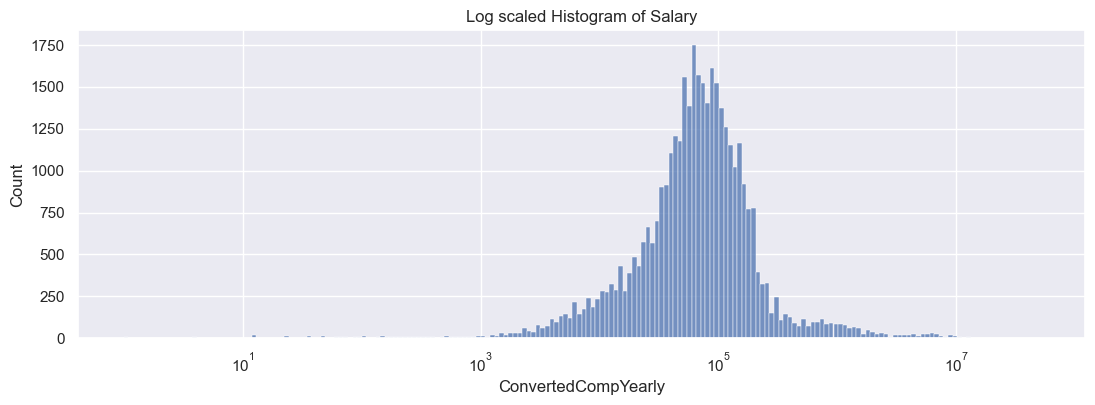

In [18]:
df2 = df.copy()
# op1 = op/max(op)
# plt.show()
sns.histplot(data=df2, x="ConvertedCompYearly",
             bins=200,
             kde=True).set(title='Histogram of Salary')
plt.show()
sns.histplot(data=df2, x="ConvertedCompYearly",
             bins=200,
            log_scale=True).set(title='Log scaled Histogram of Salary')
plt.show()
# op2 = np.log(op)
# plt.hist(op2, bins=100, range=(0,max(op2)), color = 'red', edgecolor = 'white', density=True, log=True)
# plt.xlabel('Yeary Salary (log scaled)')
# plt.ylabel('Frequency')
# plt.title('Yeary Salary Distribution (log scaled)')
# # plt.grid()
# plt.show()

3 % percentile value: 4644.0  |  85 % percentile value: 161424.0


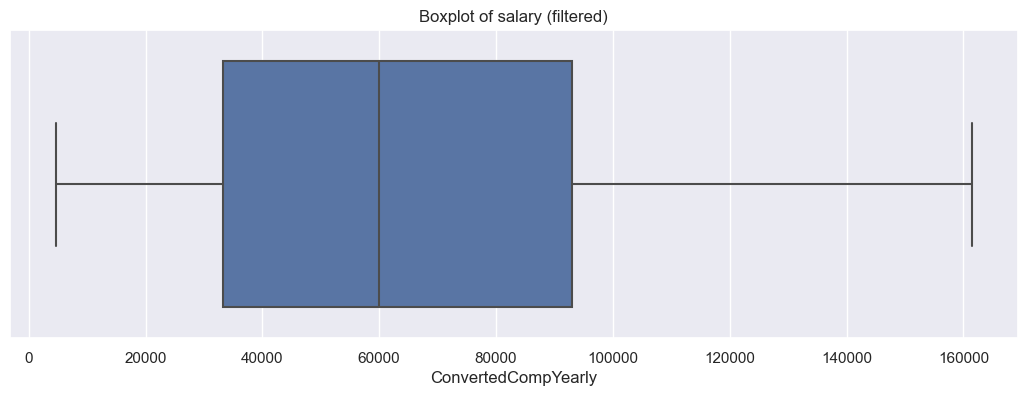

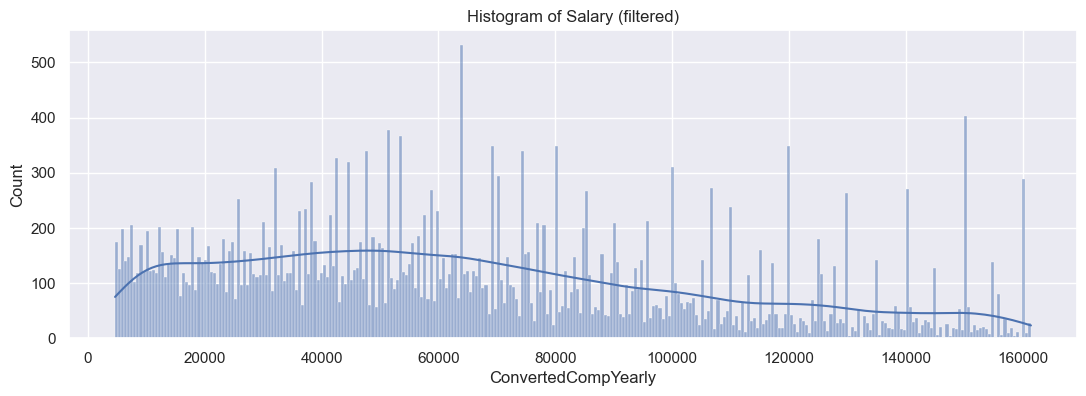

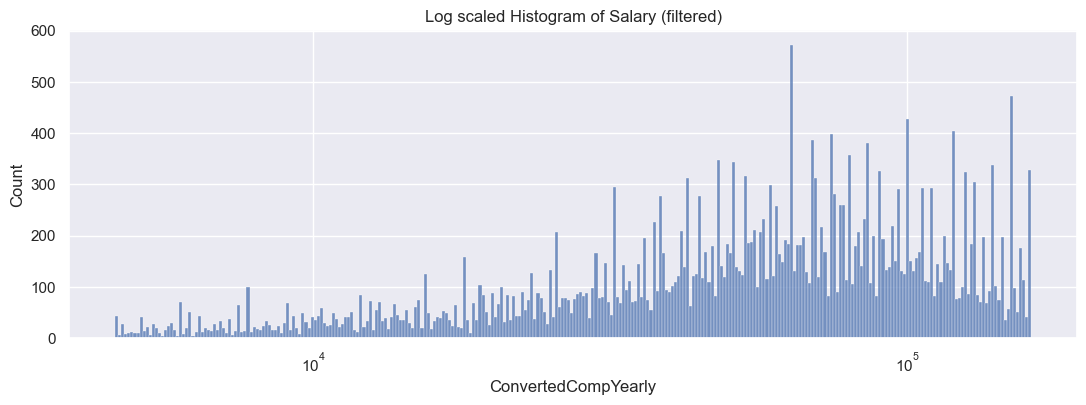

In [19]:
df2 = df.copy()
th1 = 3
th2 = 85
thv = [df2['ConvertedCompYearly'].dropna().quantile(th1/100.), df2['ConvertedCompYearly'].dropna().quantile(th2/100.)]
print(th1,'% percentile value:',thv[0],' | ', th2,'% percentile value:',thv[1])
df2 = df2[(df['ConvertedCompYearly'] >= thv[0]) & (df2['ConvertedCompYearly'] <= thv[1])]
# sns.set_theme(style="white", palette=None)
sns.boxplot(data=df2,
            x="ConvertedCompYearly").set(title='Boxplot of salary (filtered)')
plt.show()
sns.histplot(data=df2, x="ConvertedCompYearly",
             bins=300,
             kde=True).set(title='Histogram of Salary (filtered)')
plt.show()
sns.histplot(data=df2, x="ConvertedCompYearly",
             bins=300,
            log_scale=True).set(title='Log scaled Histogram of Salary (filtered)')
plt.show()
# df['ConvertedCompYearly'].dropna().shape[0] - df2['ConvertedCompYearly'].dropna().shape[0]
# df2

In [20]:
ds = df2[['Country', 'ConvertedCompYearly']]
ds = pd.DataFrame(ds)
old_name = ['Hong Kong (S.A.R.)',
            'Iran, Islamic Republic of...',
            'The former Yugoslav Republic of Macedonia',
            'Republic of Korea',
            'Congo, Republic of the...',
            'Timor-Leste',
            'United Kingdom of Great Britain and Northern Ireland',
            'United States of America',
            'Swaziland']
new_name = ['Hong Kong',
            'Iran',
            'North Macedonia',
            'South Korea',
            'Republic of the Congo',
            'Democratic Republic of Timor-Leste',
            'United Kingdom',
            'United States',
            'Eswatini']
ds = country_name_process(ds, old_name, new_name)
ds = pd.DataFrame(ds)

In [21]:
# count = countryNoNan['country'].value_counts()
# countryNoNan.unique()
CountryDict = dict()
for i in countriesV:
    cord = geolocate(i)
    try:
        CountryDict[i] = [cord, countryFrq[i]]
    except:
        print(i, 'has problem')

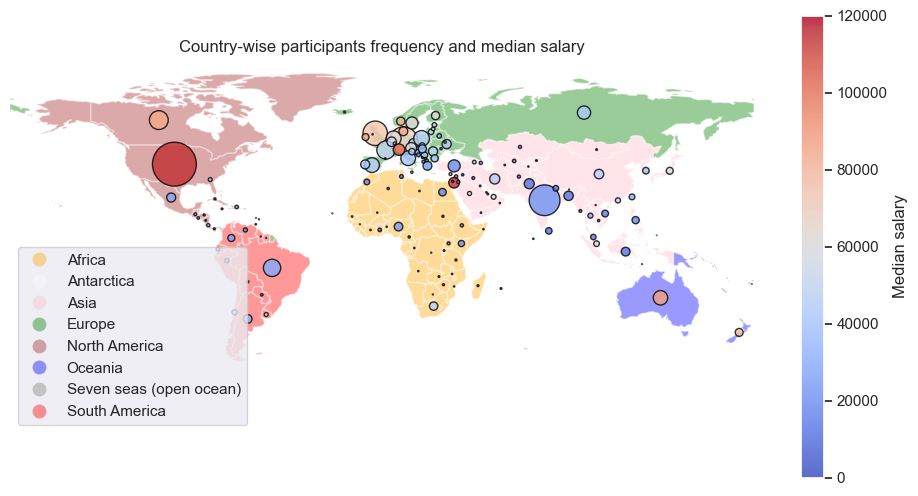

In [22]:
# ds2 = ds.groupby('Country')['ConvertedCompYearly'].mean()
ds2 = ds.groupby('Country')['ConvertedCompYearly'].median()

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
color_dict = {'Africa':'orange', 'Antarctica':'white', 'Asia':'pink', 
              'Europe':'green', 'North America':'brown',
              'Oceania':'blue', 'Seven seas (open ocean)':'gray',
              'South America':'red'}

fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(ax=ax, alpha=0.4, column="continent", legend=True, cmap=colors.ListedColormap(list(color_dict.values())))
# worldmap.plot(ax=ax, color = 'lightgray')
x = []
y = []
z = []
d = []

for ck in countriesV:
    try:
        d.append(ds2[ck])
        x.append(CountryDict[ck][0][1])
        y.append(CountryDict[ck][0][0])
#         z.append(ds_c[ck])
        z.append(CountryDict[ck][1])
        
    except:
        pass
        
    
z = (z/max(z))*1000
# d = np.log(d)
plt.scatter(x, y, s=z, c=d, alpha=0.8, vmin=0, vmax=max(d), cmap='coolwarm',  edgecolor='black', linewidth=1)
# plt.scatter(x, y, s=z, c='blue', alpha=0.3)

plt.colorbar(label='Median salary')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Country-wise participants frequency and median salary")
plt.axis('off')
plt.show()

# ds2['United States of America']
# ds2

# Salary processing (based on countrywise avg. salary)<a name='salproc' />
<p> Own to Country salary Ratio, O2C = (Salary of X) / (Avg. salary of X's country)</p>
<p>Reference: https://codesubmit.io/blog/software-engineer-salary-by-country/>https://codesubmit.io/blog/software-engineer-salary-by-country/ </p><br>
<a href=#ind>Go top</a>

In [23]:
# dcs = df[['Country', 'ConvertedCompYearly']]
dcs = df.copy()
# dcs = dcs.dropna()
# dcs

In [24]:
dcs['Country'] = countryNoNan

In [25]:
countryNoNan = dcs['Country'].dropna()

old_name = ['Hong Kong (S.A.R.)',
            'Iran, Islamic Republic of...',
            'The former Yugoslav Republic of Macedonia',
            'Republic of Korea',
            'Congo, Republic of the...',
            'Timor-Leste',
            'United Kingdom of Great Britain and Northern Ireland',
            'United States of America',
            'Swaziland']
new_name = ['Hong Kong',
            'Iran',
            'North Macedonia',
            'South Korea',
            'Republic of the Congo',
            'Democratic Republic of Timor-Leste',
            'United Kingdom',
            'United States',
            'Eswatini']

countryNoNan = country_name_process(countryNoNan, old_name, new_name)

# cmd.Cmd().columnize(countryNoNan.unique().tolist(), displaywidth=120)
dcs['Country'] = countryNoNan
# dcs = dcs.dropna()
# dcs

In [26]:
dsal = pd.read_csv('SW_Salary.csv')
# dsal
dict_sal = area_dict = dict(zip(dsal['COUNTRY'], dsal['SALARY']))
dict_sal
# pd.DataFrame(dict_sal.values(), index=dict_sal.keys())
# pd.DataFrame.from_dict(dict_sal, orient="index")

{'United States': 110140,
 'Switzerland': 97518,
 'Israel': 71559,
 'Denmark': 63680,
 'Canada': 61680,
 'Norway': 57013,
 'Australia': 55640,
 'United Kingdom': 55275,
 'Germany': 52275,
 'Sweden': 50437,
 'Ireland': 48427,
 'Finland': 47850,
 'The Netherlands': 45180,
 'France': 43849,
 'New Zealand': 42399,
 'Singapore': 41864,
 'Argentina': 39898,
 'Japan': 36024}

In [27]:
dsal_ctr = dsal['COUNTRY']
dsal_ctr
dsal_ctr_lst = dsal_ctr.to_list()
print('Countries in salary dataset:')
cmd.Cmd().columnize(dsal_ctr_lst, displaywidth=100)

Countries in salary dataset:
United States  Denmark  Australia       Sweden   The Netherlands  Singapore
Switzerland    Canada   United Kingdom  Ireland  France           Argentina
Israel         Norway   Germany         Finland  New Zealand      Japan    


In [28]:
dcs2 = dcs.copy()
dcs3 = dcs2[dcs2['Country'].isin(dsal_ctr_lst)].copy()
for x in range (0, dcs3.shape[0]):
    cn = dcs3['Country'].iloc[x]
    sl = dict_sal[cn]
    dcs3['ConvertedCompYearly'].iloc[x] = dcs3['ConvertedCompYearly'].iloc[x]/sl

# dcs3
dcs3.to_csv('./dcs3.csv')

C:\Users\imrul\AppData\Local\Temp\ipykernel_17244\2183917867.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dcs3['ConvertedCompYearly'].iloc[x] = dcs3['ConvertedCompYearly'].iloc[x]/sl


In [29]:
dcs3.shape[0]

35501

In [30]:
dcs_gr = dcs3.groupby(['Country'])['ConvertedCompYearly'].median()
dcs_gr_dict = dcs_gr.to_dict()
# dcs_gr_dict.keys()
print('Median of country wise p2c salary ratio:')
dcs_gr_dict

Median of country wise p2c salary ratio:


{'Argentina': 0.7594365632362524,
 'Australia': 1.6853342918763479,
 'Canada': 1.5191472114137483,
 'Denmark': 1.4050251256281407,
 'Finland': 1.321682340647858,
 'France': 1.1674610595452577,
 'Germany': 1.326025824964132,
 'Ireland': 1.9819315671009974,
 'Israel': 1.792059698989645,
 'Japan': 1.741477903619809,
 'New Zealand': 1.9725229368617185,
 'Norway': 1.4551768894813464,
 'Singapore': 1.7723103382381042,
 'Sweden': 1.2083985962686123,
 'Switzerland': 1.1665641214955187,
 'United Kingdom': 1.500171867933062,
 'United States': 1.3165062647539496}

In [31]:
dcs_gr2 = dcs3.groupby(['Country'])['ConvertedCompYearly'].count()
dcs_gr_dict2 = dcs_gr2.to_dict()
# dcs_gr_dict.keys()
# print('Number of participants per country:')
# dcs_gr_dict2

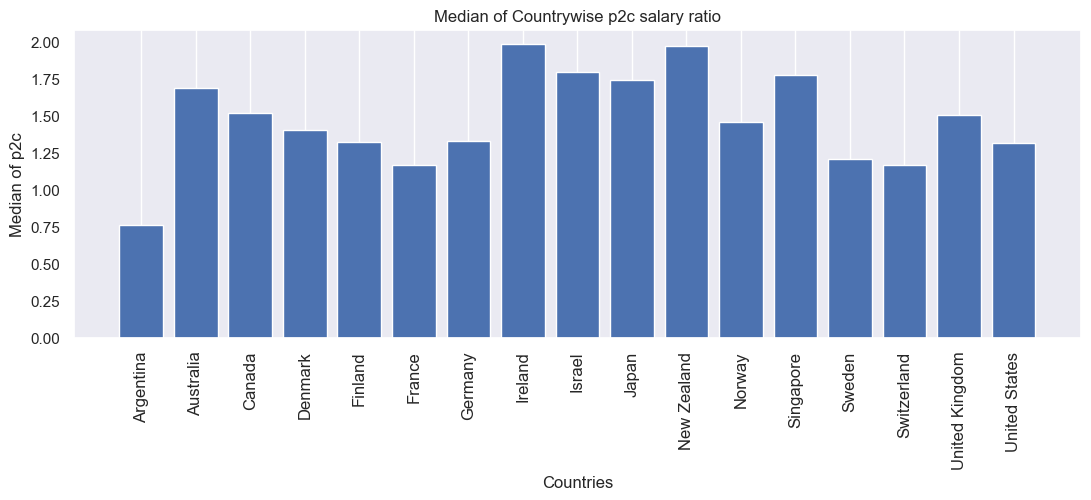

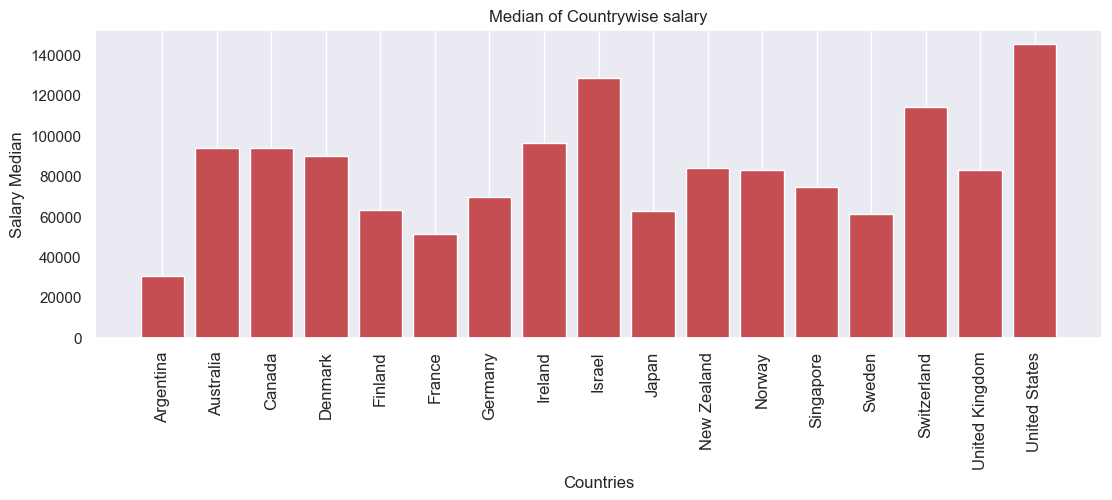

In [32]:
names = list(dcs_gr_dict.keys())
values = list(dcs_gr_dict.values())
plt.bar(names, values, tick_label=names)
plt.xticks(rotation='vertical',fontsize = 12)
plt.title('Median of Countrywise p2c salary ratio')
plt.xlabel('Countries')
plt.ylabel('Median of p2c')
plt.grid(axis='y')
plt.show()
# values

dcs2 = dcs.copy()
dcs3 = dcs2[dcs2['Country'].isin(dsal_ctr_lst)].copy()
dcs_gen = dcs3.groupby(['Country'])['ConvertedCompYearly'].median()
dcs_gen_dict = dcs_gen.to_dict()
names1 = list(dcs_gen_dict.keys())
values1 = list(dcs_gen_dict.values())
plt.bar(names1, values1, tick_label=names1, color='r')
plt.xticks(rotation='vertical',fontsize = 15)
plt.title('Median of Countrywise salary')
plt.xlabel('Countries')
plt.ylabel('Salary Median')
plt.grid(axis='y')
plt.show()

In [33]:
CnSalDict = dict()
for i in dcs_gr_dict:
    try:
        CnSalDict[i] = [geolocate(i), dcs_gr_dict[i], dcs_gr_dict2[i]]
    except:
        print(i, 'has problem')
CnSalDict

{'Argentina': [(-34.9964963, -64.9672817), 0.7594365632362524, 279],
 'Australia': [(-24.7761086, 134.755), 1.6853342918763479, 833],
 'Canada': [(61.0666922, -107.991707), 1.5191472114137483, 1481],
 'Denmark': [(55.670249, 10.3333283), 1.4050251256281407, 339],
 'Finland': [(63.2467777, 25.9209164), 1.321682340647858, 282],
 'France': [(46.603354, 1.8883335), 1.1674610595452577, 1378],
 'Germany': [(51.1638175, 10.4478313), 1.326025824964132, 2912],
 'Ireland': [(52.865196, -7.9794599), 1.9819315671009974, 203],
 'Israel': [(30.8124247, 34.8594762), 1.792059698989645, 394],
 'Japan': [(36.5748441, 139.2394179), 1.741477903619809, 202],
 'New Zealand': [(-41.5000831, 172.8344077), 1.9725229368617185, 286],
 'Norway': [(60.5000209, 9.0999715), 1.4551768894813464, 321],
 'Singapore': [(1.357107, 103.8194992), 1.7723103382381042, 105],
 'Sweden': [(59.6749712, 14.5208584), 1.2083985962686123, 665],
 'Switzerland': [(46.7985624, 8.2319736), 1.1665641214955187, 520],
 'United Kingdom': [(5

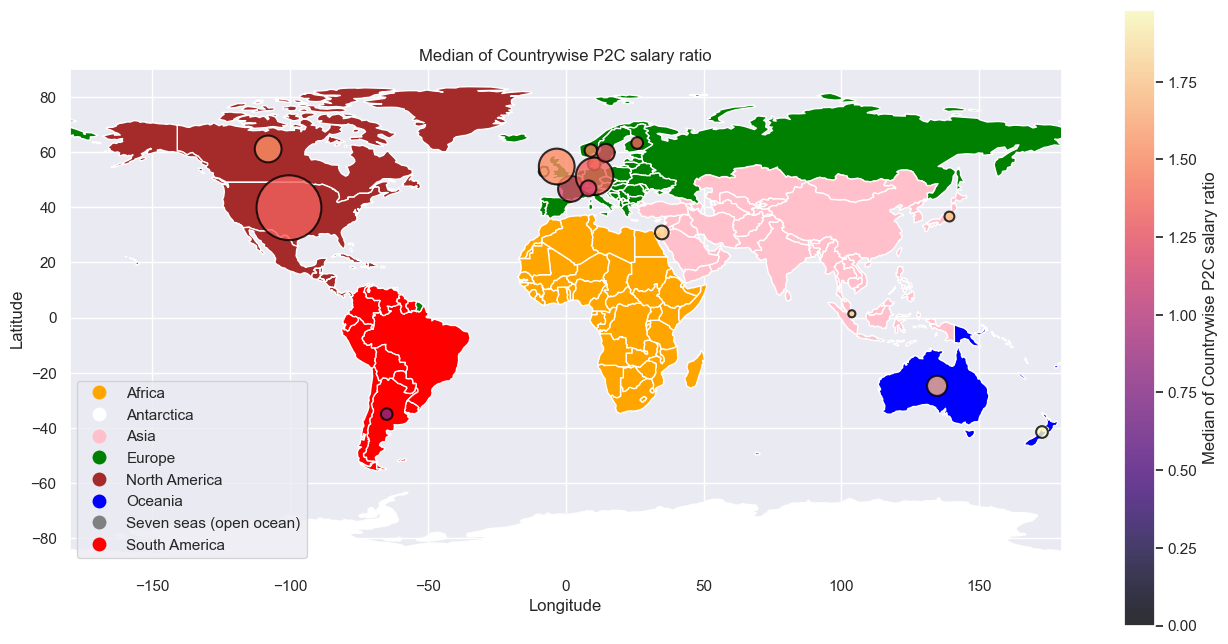

In [36]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# worldmap = worldmap[['continent', 'geometry', 'pop_est']]
# continents = worldmap.dissolve(by='continent', aggfunc='sum')
color_dict = {'Africa':'orange', 'Antarctica':'white', 'Asia':'pink', 
              'Europe':'green', 'North America':'brown',
              'Oceania':'blue', 'Seven seas (open ocean)':'gray',
              'South America':'red'}

fig, ax = plt.subplots(figsize=(16, 8))
worldmap.plot(ax=ax, column="continent", legend=True, cmap=colors.ListedColormap(list(color_dict.values())))
# continents.plot(column = 'pop_est', cmap='YlOrRd', scheme='boxplot', ax=ax);
x = []
y = []
z = []
h = []
# threshold = 10
for ck in CnSalDict:
    x.append(CnSalDict[ck][0][1])
    y.append(CnSalDict[ck][0][0])
    z.append(CnSalDict[ck][1])
    h.append(CnSalDict[ck][2])

# z = (z/max(z))*1000
# cz= z/max(z)
# cz = ds['ConvertedCompYearly']
# cz= cz/max(cz)
# print(z)
mz = [value*0.25 for value in h]

plt.scatter(x, y, s=mz, c=z, alpha=0.8, vmin=0, vmax=max(z), cmap='magma',edgecolor='black', linewidth=1.5)
# plt.scatter(x, y, s=z, c='blue', alpha=0.7, edgecolor='black', linewidth=1)

plt.colorbar(label='Median of Countrywise P2C salary ratio')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Median of Countrywise P2C salary ratio")
plt.show()

<a href=#ind>Go top</a>